# Imports

In [2]:
import pandas as pd
import numpy as np
import sys
from pathlib import Path
import seaborn as sns

# Helper Functions

In [3]:
def load_data(folder_from_parent:str, filename:str):

    path = str(Path.cwd().parents[0] / folder_from_parent)
    path_ = path + '/' + filename

    try:

        if '.xlsx' in filename:
            df = pd.read_excel(path_)

        else:
            df = pd.read_csv(path_)
        
    except FileNotFoundError:
        print('File is missing.')

    return df

# Load data

In [4]:
df = load_data('data', 'small_juro_pre.xlsx')

In [5]:
df.head()

,Data,Abertura,Máxima,Mínima,Fechamento,DATA,PRÉ 10YRS
0,2022-03-02,2319.07,2540.46,2178.15,2532.16,2022-03-31,11.720000
1,2022-02-01,2446.03,2468.00,2244.38,2319.07,2022-02-25,11.630000
2,2022-01-03,2365.28,2449.23,2074.96,2446.03,2022-01-31,11.361909
3,2021-12-01,2278.72,2476.86,2211.72,2365.24,2021-12-31,10.713180
4,2021-11-01,2332.01,2628.90,2225.65,2278.71,2021-11-30,11.349279


# Exploratory Data Analysis

## Data Overview

It helps in getting a quick overview of the dataset. 

This section is used to get a brief summary of the dataframe.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        163 non-null    datetime64[ns]
 1   Abertura    163 non-null    float64       
 2   Máxima      163 non-null    float64       
 3   Mínima      163 non-null    float64       
 4   Fechamento  163 non-null    float64       
 5   DATA        163 non-null    datetime64[ns]
 6   PRÉ 10YRS   163 non-null    float64       
dtypes: datetime64[ns](2), float64(5)
memory usage: 9.0 KB


In [7]:
# columns
df.columns

Index(['Data', 'Abertura', 'Máxima', 'Mínima', 'Fechamento', 'DATA ',
       'PRÉ 10YRS '],
      dtype='object')

In [8]:
df.tail()

,Data,Abertura,Máxima,Mínima,Fechamento,DATA,PRÉ 10YRS
158,2009-01-02,493.79,544.01,467.37,493.93,2009-01-30,12.500
159,2008-12-01,475.43,495.29,442.31,493.78,2008-12-31,12.727
160,2008-11-03,487.72,528.18,426.80,475.48,2008-11-28,15.985
161,2008-10-01,667.63,669.79,405.71,487.72,2008-10-31,17.450
162,2008-09-01,869.50,876.40,610.66,667.48,2008-09-30,14.110


In [68]:
# number of null values
df.isnull( ).sum( )

Data          0
Abertura      0
Máxima        0
Mínima        0
Fechamento    0
DATA          0
PRÉ 10YRS     0
dtype: int64

In [69]:
# number of unique elements
df.nunique( )

Data          163
Abertura      163
Máxima        163
Mínima        163
Fechamento    163
DATA          163
PRÉ 10YRS     162
dtype: int64

## Data Cleaning

In this section we handle null/missing values, incorrect types and rename columns.

In [70]:
# drop duplicated column
df_cleaned = df.drop(columns='DATA ')

In [71]:
# rename columns
df_cleaned.rename(columns = {
    'Data':'date',
    'Abertura':'open',
    'Máxima':'high',
    'Mínima':'low',
    'Fechamento':'close',
    'PRÉ 10YRS ':'pre_10yrs'
    }, inplace = True)
    
df_cleaned.head()

,date,open,high,low,close,pre_10yrs
0,2022-03-02,2319.07,2540.46,2178.15,2532.16,11.720000
1,2022-02-01,2446.03,2468.00,2244.38,2319.07,11.630000
2,2022-01-03,2365.28,2449.23,2074.96,2446.03,11.361909
3,2021-12-01,2278.72,2476.86,2211.72,2365.24,10.713180
4,2021-11-01,2332.01,2628.90,2225.65,2278.71,11.349279


## Summary Statistics

A statistical summary for numerical columns present in the dataset. 

This section calculates some statistical measures like percentile, mean and standard deviation of the numerical values of the Series or DataFrame.

In [72]:
df_cleaned.describe()

,open,high,low,close,pre_10yrs
count,163.000000,163.000000,163.000000,163.000000,163.000000
mean,1499.683742,1575.750245,1425.761104,1509.850798,11.215889
std,604.214394,640.979235,575.990837,607.514758,2.095075
min,469.320000,492.850000,405.710000,469.320000,6.749000
25%,1139.485000,1180.960000,1079.415000,1141.215000,9.866491
50%,1329.200000,1402.170000,1278.910000,1332.390000,11.471032
75%,1730.195000,1775.885000,1641.330000,1745.885000,12.410128
max,3144.750000,3232.890000,3104.510000,3144.680000,17.450000


**Correlation:**

Notice how the 'close' attribute has a very high negative correlation with 'pre_10yrs'.

In [73]:
# correlation between numeric attributes
df_cleaned.corr()

,open,high,low,close,pre_10yrs
open,1.000000,0.994262,0.981098,0.979408,-0.728551
high,0.994262,1.000000,0.980592,0.986654,-0.743624
low,0.981098,0.980592,1.000000,0.992390,-0.741874
close,0.979408,0.986654,0.992390,1.000000,-0.760568
pre_10yrs,-0.728551,-0.743624,-0.741874,-0.760568,1.000000


## Data Visualization

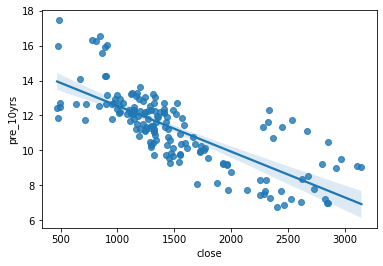

In [75]:
# linear regression between 'close' and 'pre_10yrs'
sns.regplot(x = 'close', y = 'pre_10yrs', data = df_cleaned);